## Indice

1. [Introducción](#intro)
2. [Datos](#datos)
    1. [Tarea 1](#tarea1)
        - [Distribución de Carpetas para Tarea 1](#tarea1dist)
    2. [Tarea 2](#tarea2)
        - [Distribución de carpetas y archivos para la tarea 2](#tarea2dist)
    3. [Tarea 3](#tarea3)
        - [Distribución de carpetas para tarea 3](#tarea3dist)
    4. [Tarea 4](#Tarea-4)
    5. [Tarea 5](#Tarea-5)
3. [Descripción del Desafío y Solución Propuesta](#Descripción-del-Desafío-y-Solución-Propuesta)
4. [Código](#Código)
    1. [Librerías](#Librerías)
    2. [utilities.py](#utilities.py)
    3. [average_precision.py](#average_precision.py)
    4. [data_generator.py](#data_generator.py)
    5. [config.py](#config.py)
    6. [create_validation.py](#create_validation.py)
    7. [features.py](#features.py)
    8. [model_pytorch.py](#model_pytorch.py)
    9. [main_pytorch.py](#main_pytorch.py)
5. [Ejecución](#Ejecución)


# Revisión de Modelo de Etiquetado en Datos de Audio

## Introducción <a id="intro"></a>

En motivo del curso de Minería y Aprendizaje con Datos, la última unidad enfocada al análisis de datos de audio, para el presente trabajo se analizará un modelo generado por los participantes Qiuqiang Kong, Turab Iqbal, Yong Xu, Wenwu Wang y Plumbley quienes concursaron del desafío planteado por la comunidad DCASE durante el año 2018.

Dicho desafío consistió en evaluar diversos sistemas de etiquetado automático de una batería de audios, ya sean instrumentos musicales, sonidos de personas, ruidos domésticos, animales, entre otros. Para ésto se utilizaron etiquetas de calidad variable, es decir, algunas etiquetas pueden ser muy precisas y muy detalladas, mientras que otras pueden ser más generales o menos exactas. La elaboración del desafío tiene como finalidad entregar información relevante para el desarrollo de clasificadores automáticos ya sea de descripción de multimedia o de monitoreo acústico. Éste desafío se aloja en la plataforma de **Kaggle**, proporcionando los recursos utilizados para la creación de los modelos (datos, las tablas de calificación y sus resultados finales). Así entonces, los datos fueron de un carácter acústico, encontrados como archivos de audio PCM sin comprimir de 16 bits, a 44.1 kHz, mono. El etiquetado de los datos fue en base a los proporcionados por la plataforma **Freesound** y las categorías de la ontología de **AudioSet**, siendo etiquetadas de manera automática mediante muestra de audios de Freesound. Una vez realizado éste proceso automático, fue verificado de manera manual según la descripción de la categoría de AudioSet.

## Datos <a id="datos"></a>

### Tarea 1  <a id="tarea1"></a>

Para la primera tarea de clasificación el conjunto de datos contiene un total de 10 clases distintas de escenas de audio. Los datos se dividen en varias carpetas según el dispositivo de grabación, como así también el tipo de tarea. En total hay 8640 audios para el desarrollo de la subtarea A, utilizando aullidos grabados con un sistema binaural (device A) a una frecuencia de 48kHz y 24 bits. Para la subtarea B se utilizaron audios grabados en formato mono a una frecuencia de 44.1 kHz (device B y C). El conjunto de datos de la subtarea B se divide para los device A, B y C en un total de 8640, 720 y 720 audios respectivamente. Finalmente para la tarea C no se especifican requisitos particulares sobre sus atributos respecto a los datos de audio. Esta subtarea incluye un conjunto de datos genérico de 1200 audios. Las etiquetas utilizadas fueron:

- **Airport** (Aeropuerto)
- **Bus**
- **Metro**
- **Metro_station** (Estación de metro)
- **Park** (Parque)
- **Public_square** (Plaza pública)
- **Shopping_mall** (Centro comercial)
- **Street_pedestrian** (Calle peatonal)
- **Street_traffic** (Tráfico en la calle)
- **Tram** (Tranvía)

La manera de estructurar los datos para su análisis fue generando distintas carpetas para facilitar su orden. Estas fueron denominadas **development**, **evaluation** y **leaderboard** las cuales contienen subcarpetas específicas para cada uno de los audios, archivos de configuración y metadatos almacenados en archivos CSV. Dichas carpetas están organizadas de manera que facilitan la gestión y el acceso a los datos según su uso en el entrenamiento, evaluación y presentaciones de resultados. Así también, se generaron desarrollo y evaluación adaptadas para el uso de dispositivos móviles.

#### Distribución de Carpetas para Tarea 1 <a id="tarea1dist"></a>

| Carpeta                                      | Audios | Archivos Adicionales   |
|----------------------------------------------|--------|-------------------------|
| **TUT-urban-acoustic-scenes-2018-Development** | 8640   | evaluation_setup, meta.csv |
| **TUT-urban-acoustic-scenes-2018-Evaluation** | 3600   | evaluation_setup, meta.csv |
| **TUT-urban-acoustic-scenes-2018-Leaderboard** | 1200   | evaluation_setup, meta.csv |
| **TUT-urban-acoustic-scenes-2018-mobile-development** | 10080  | evaluation_setup, meta.csv |
| **TUT-urban-acoustic-scenes-2018-mobile-evaluation** | 15120  | evaluation_setup, meta.csv |
| **TUT-urban-acoustic-scenes-2018-mobile-leaderboard** | 2400   | evaluation_setup, meta.csv |

El autor deja un espectrograma log mel disponible para la observación de los datos:


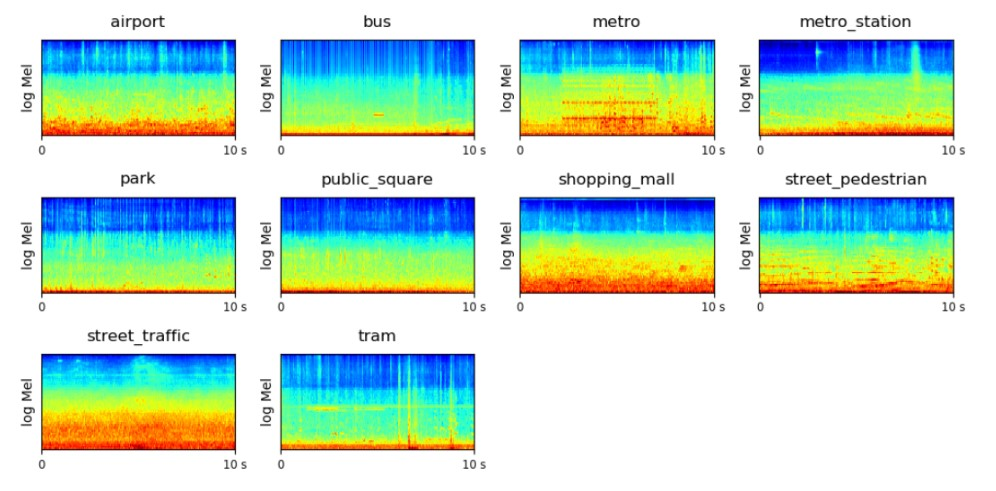

In [14]:
from IPython.display import Image, display

display(Image(filename="imagenes/tarea1espectrograma.jpg"))

### Tarea 2 <a id="tarea2"></a>

El conjunto de datos TUT Urban Acoustic Scenes del 2018 utilizado para la clasificación consta de un total de 8640 archivos de audio, equivalente a un total cercano a 24 horas de grabaciones. Este conjunto se amplía en su versión “mobile” a un total de 28 horas. En ambos hay un total de 10 clases distintas, representando diferentes escenas acústicas, las cuales tienen sus respectivas etiquetas de referencia en el conjunto de desarrollo que indican la clase de cada escena acústica correspondiente. Por otro lado, los conjuntos de evaluación no poseen dichas etiquetas, con el fin de garantizar una evaluación imparcial de los participantes. Las etiquetas son:

- Airport (aeropuerto)
- Indoor shopping mall (centro comercial)
- Metro station (estación de metro)
- Pedestrian street (calle peatonal)
- Public square (plaza pública)
- Street with medium traffic (calle con tráfico medio)
- Travelling by tram (viajando en tranvía)
- Travelling by bus (viajando en autobús)
- Travelling by underground metro (viajando en metro)
- Urban park (parque urbano)

Para la tarea número dos, los datos a utilizar son un total de 9473 clips de audio, con una duración de 300ms a 30s debido a la diversidad de categorías de sonido. El preprocesamiento utilizado consiste en espectrogramas mel logarítmicos que se ajustan o dividen en espectrogramas mel logarítmicos de 2 segundos para la entrada a una red neuronal convolucional (CNN). Esta creación de espectrogramas de tamaños más pequeños es realizada con la intencionalidad de estandarizar la longitud de entrada para la CNN. Esto con la funcionalidad de establecer una longitud específica para los datos entregados, buscando simplificar el proceso de entrenamiento de la red neuronal. Además, al trabajar con espectrogramas mel logarítmicos se reduce la dimensionalidad de los datos del audio en comparación si utilizamos directamente los datos sin procesar. Por otra parte, los espectrogramas son capaces de capturar las características más importantes del sonido, como su distribución de energía en diferentes frecuencias.

La manera de organizar la estructura de carpetas de prueba y entrenamiento fue mediante dos carpetas principales, denominadas `audio_train` y `audio_test`. La carpeta `audio_train` contiene un total de 9473 archivos de audio que serán utilizados para entrenar el modelo. Por otra parte, la carpeta `audio_test` incluye un total de 9400 archivos de audio que serán utilizados para la evaluación del modelo. Los archivos de audio de entrenamiento, a su vez, están etiquetados y verificados con un total de 3710 de manera manual y 5763 no verificados manualmente. En cuanto a los datos de prueba, estos incluyen alrededor de 1600 archivos verificados manualmente y el restante no poseen dicha evaluación. El conjunto además posee dos archivos `.csv` que contienen las etiquetas de los datos de entrenamiento bajo el nombre `train.csv` y el archivo `sample_submission.csv`, el cual es utilizado para las predicciones del modelo sobre los datos de prueba.

#### Distribución de carpetas y archivos para la tarea 2 <a id="tarea2dist"></a>

- `audio_train` (9473 audios)
- `audio_test` (9400 audios)
- `train.csv` (Archivo .csv con las etiquetas de los datos de entrenamiento)
- `sample_submission.csv` (Archivo CSV para las predicciones de la prueba)

### Tarea 3 <a id="tarea3"></a>

Para la tarea 3 se utilizaron un total de 35690 clips de audio para el conjunto de desarrollo, los cuales se subdividen en:

- `freefield1010` (7690 audios)
- `warblrb10k` (8000 audios)
- `BirdVox-DCASE-20k` (20000 audios)

En cuanto al conjunto de prueba, con un total de 12620 clips de audio subdivididos en:

- `warblrb10k` (2000 audios)
- `chernobyl` (6620 audios)
- `PolandNFC` (4000 audios)

En cuanto a las etiquetas utilizadas, debido a la finalidad del desafío, estas únicamente consisten en presencia u ausencia de aves.

#### Distribución de carpetas para tarea 3 <a id="tarea3dist"></a>

- `wav` (35690 audios)
- `test_wav` (12620 audios)
- `BirdVoxDCASE20k_csvpublic.csv`
- `ff1010bird_metadata_2018.csv`
- `warblrb10k_public_metadata_2018.csv`
- `dcase2018_task3_bird_examplesubmission.csv`

Al observar el espectrograma log mel estos presentan la siguiente distribución:

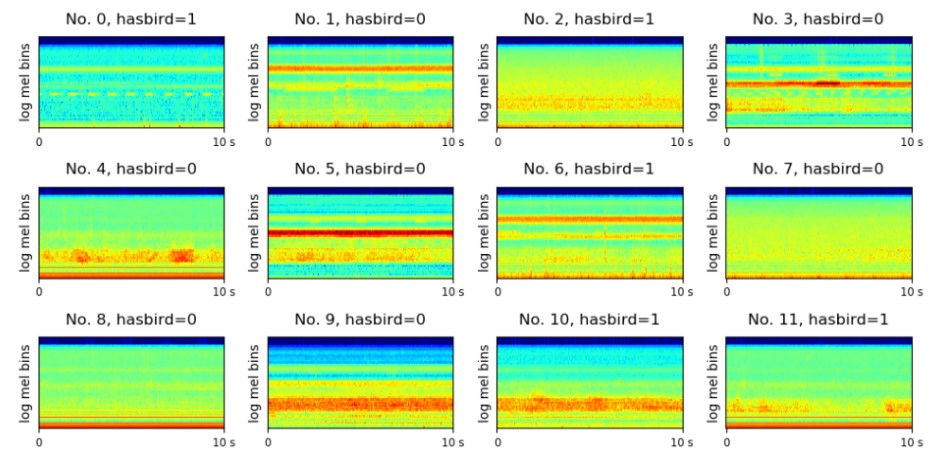

In [15]:
display(Image(filename="imagenes/tarea2espectrograma.jpg"))

### Tarea 4 <a id="Tarea 4"></a>

Para la tarea 4 se utilizaron **10 clases de audio**, con un **conjunto de desarrollo** de **1578 clips de audio** débilmente etiquetados, **14412 clips de audio** sin etiquetar en dominio y **39999 clips de audio** sin etiquetar fuera de dominio. Cada clip de audio tiene una **duración de 10 segundos**. 

En cuanto a preprocesamiento, para mantener la **resolución temporal** de los mapas de características, se aplican operaciones de **max pooling** en el eje de frecuencias, más no en el eje temporal de los datos. El uso de **max pooling** es utilizado con la funcionalidad de **reducir la dimensionalidad** de los datos, disminuyendo la cantidad de parámetros totales, conservando así las **características más relevantes** de cada región analizada. La decisión de realizar únicamente **max pooling** al eje de frecuencias es debido a la tarea en cuestión, enfocada a la **detección de eventos de sonido** en un espacio temporal. Si se aplicase el **max pooling** al eje temporal, podríamos perder **detalles de la distribución a lo largo del tiempo**, lo que afectará al rendimiento del modelo en la tarea solicitada.

De esta manera entonces las **etiquetas** se distribuyeron de la siguiente manera:

- **Train (weak)**: 1578
- **Train (unlabel_in_domain)**: 14412
- **Train (unlabel_out_of_domain)**: 39999
- **Test (strong)**: 288
- **Evaluation**: 880

Y el **espectrograma log mel** de cada una de las escenas presenta la siguiente distribución:

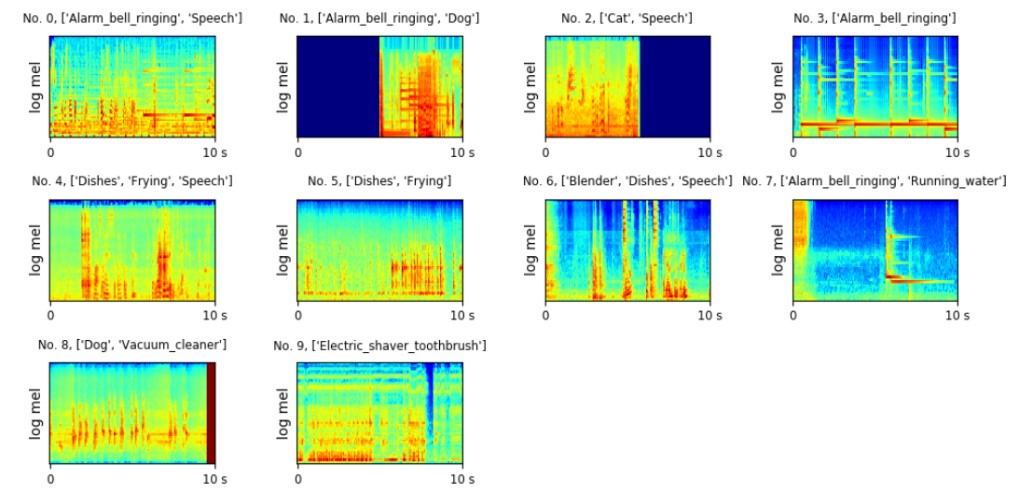

In [16]:
display(Image(filename="imagenes/tarea3espectrograma.jpg"))

### Tarea 5 <a id="Tarea 5"></a>

El **desafío número cinco** consistió en la **detección de actividades domésticas** mediante el uso de **clasificación de audio** grabados en una **matriz de micrófonos multi-canal**, intentando explorar cómo las grabaciones con estas características pueden mejorar el trabajo de identificación en las actividades diarias como cocinar, ver televisión o trabajar.

El conjunto de datos para la tarea consistió en un total de **72984 clips de audio** con una **duración total de 10 segundos**. Para su **preprocesamiento** se realizó una **conversión de clips de audio multicanal** a **clips de un canal de audio único**.

El total de **etiquetas** existentes para la tarea 5 son:

- **Ausencia (nadie presente)**: 18860
- **Cocinando**: 5124
- **Lavando platos**: 1424
- **Comiendo**: 2308
- **Otras actividades**: 2060
- **Actividad social**: 4944
- **Limpiado con aspiradora**: 972
- **Viendo TV**: 18648
- **Trabajando**: 18644

**Total**: 72984

El **espectrograma log mel** se presenta de la siguiente manera:
 siguiente manera:


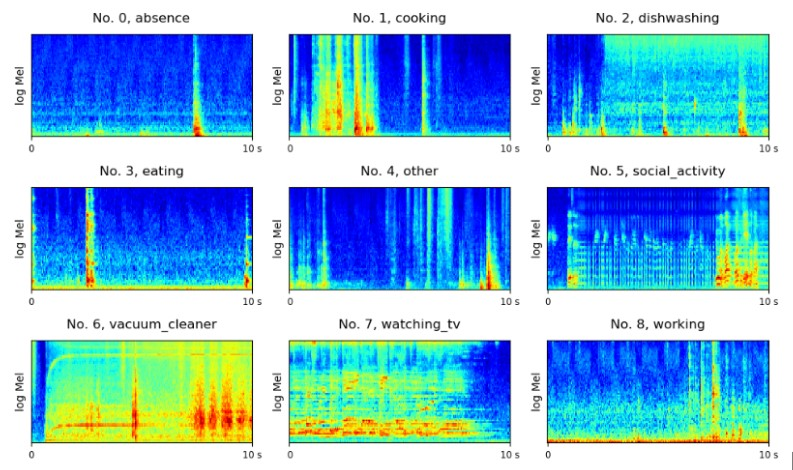

In [17]:
display(Image(filename="imagenes/tarea4espectrograma.jpg"))

## Descripción del Desafío y Solución Propuesta <a id="Descripción del Desafío y Solución Propuesta"></a>

El trabajo identificado para el análisis durante el presente informe se titula **“DCASE 2018 CHALLENGE SURREY CROSS-TASK CONVOLUTIONAL NEURAL NETWORK BASELINE”** y los autores son **Qiuqiang Kong, Turab Iqbal, Yong Xu, Wenwu Wang, Mark D. Plumbley**. Son miembros del **Centre for Vision, Speech and Signal Processing (CVSSP)** de la Universidad de Surrey.

Para señalar los resultados obtenidos por los autores, es preciso dividir las respuestas del modelo en virtud de las **etiquetas evaluadas** para la validación cruzada en cuatro pliegues de igual medida (**4 folds**), siendo necesario para el conjunto de entrenamiento y validación. 

Para la **evaluación de rendimiento** se utilizaron dos medidas:
- **Accuracy** o precisión, para determinar el porcentaje de predicciones realizadas de manera correcta en comparación con las realizadas incorrectamente.
- **MAP@3**, que evalúa la precisión del modelo respecto a las tres primeras predicciones más relevantes para cada consulta.

Los modelos fueron entrenados en dos formatos para generar contraste:
- **Red neuronal convolucional con cuatro capas (CNN4)**
- **Red neuronal convolucional con ocho capas (CNN8)**

Adicionalmente, cada uno de los resultados por etiqueta incluye su **leaderboard** tanto público como privado, el cual tiene una funcionalidad dentro del contexto de competencia, con la utilidad de que el resto de participantes observen el rendimiento obtenido en una parte del conjunto de cada uno de quienes se encuentran realizando el desafío.

**1. Clasificación de Escenas Acústicas con Variabilidad de Dispositivos:**

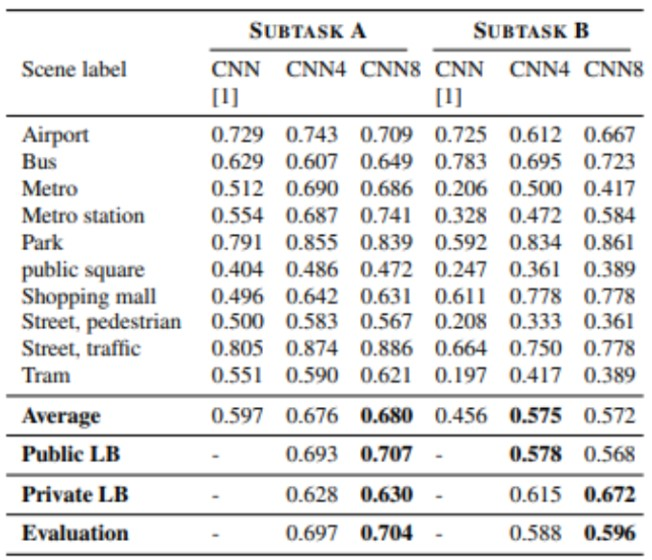

In [18]:
display(Image(filename="imagenes/resultado1.jpg", width=500, height=350))

Los resultados obtenidos señalan que, en las subtareas A la red convolucional con un total de 8 capas superan los modelos con 4 capas u únicamente dos capas (CNN [1]). Ahora, resulta interesante que para la subtarea B los resultados fueron ligeramente mejores utilizando un CNN4, ¿por qué ocurre este fenómeno?
En el caso de la subtarea B los datos recopilados no fueron obtenidos de dispositivos coincidentes, por tanto, existían otros factores que afectan al entrenamiento del modelo pudiendo generar ligeras variaciones en los archivos. De ésta manera, aquellas redes con mayor cantidad de capas serían más sensibles a dichas diferencias, y por tanto, generaría mayor precisión en indicar las etiquetas que una red convencional con menos capas. Puesto que la CNN4, por el contrario, se centraría más bien en diferencias generales, siendo ésta una posible explicación para los resultados observados

**2 Etiquetado de Audio para Categorías de Sonido Diversas:**.


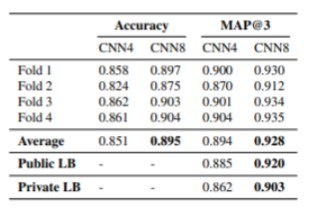

In [19]:
display(Image(filename="imagenes/resultado2.jpg", width=400, height=250))

En base a los resultados observados, podemos señalar que el modelo utilizando una **red convolucional con 8 capas** generalmente tiene un resultado superior respecto al modelo **CNN4** (**Accuracy: CNN8 (0.895), CNN4 (0.851); MAP@3: CNN8 (0.928), CNN4 (0.894)**), tanto en términos de precisión como en MAP@3. Pero, ¿por qué ocurre este fenómeno?

Mientras mayor sea el número de capas que presenta el modelo, éste tendrá más profundidad, y por ello, más posibilidad de aprender características más complejas y a mayor detalle. Esto a su vez permitirá obtener mayores características de lo que se pretende aprender, en este caso, etiquetado de audio. Esto nos ayuda a representar funciones cada vez más complejas, puesto que posee mayor información, ayudando incluso a generalizar mejor en casos nuevos. 

Por otra parte, entre las desventajas que puede traer el uso de redes convolucionales con mayor número de capas, están el costo computacional que significa entrenar un modelo con 4 capas en comparación con uno de 8 capas y, si no es manejado correctamente, puede generar un sobreajuste (para ello suelen utilizarse técnicas de regulación y el dropout).

En cuanto a los resultados obtenidos por MAP@3, esto radica en que su manera de evaluar la exactitud de la respuesta es ligeramente diferente a la de **accuracy**. Por una parte, **accuracy** indica la cantidad de veces que el modelo entregó la respuesta correcta de manera exacta, es decir, las veces que acertó de manera excelente. Por el contrario, **MAP@3** evalúa si entre las tres primeras etiquetas sugeridas por el modelo se encuentra la que efectivamente es correcta. Por esa razón, la probabilidad de “acertar” en su respuesta es mayor que en el caso de **accuracy**. Esta diferencia de evaluación puede ser la causa de los resultados más elevados en MAP@3 que en Accuracy.

La información entregada por **MAP@3** es especialmente relevante en tareas de etiquetado, puesto que ofrece los primeros tres resultados que pueden corresponder al sonido percibido por el archivo de audio. Si bien **accuracy** entregaría el etiquetado general del audio, **MAP@3** puede complementar en caso de que el archivo no posea el sonido completamente aislado. Por ejemplo, si se quisiera percibir el sonido de un pájaro y a su vez se escuchan sonidos de personas y de autos, **accuracy** señalaría si el sonido identificado relevante fue el pájaro o no, pero por el contrario, **MAP@3** señalaría (en el mejor de los casos) pájaro, persona, auto.

**3. Detección de Audio de Aves en Diversos Conjuntos de Datos**

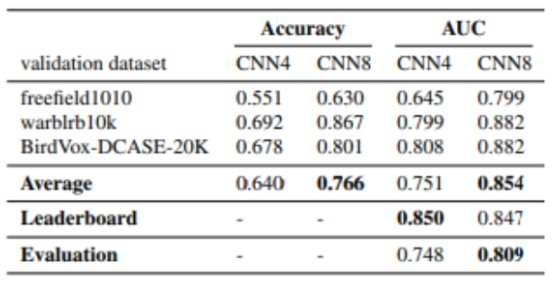

In [20]:
display(Image(filename="imagenes/resultado3.jpg", width=500, height=350))

Los resultados obtenidos señalan que, tanto la precisión como el AUC, obtenido en una red convolucional de ocho capas presentan mejores resultados que aquellas con menor capas, pero, ¿Qué es la AUC?

La área bajo la curva (Area Under the Curve) busca identificar la capacidad del modelo para poder distinguir entre la ausencia o presencia de alguna clase en particular, en este caso, de aves (utilizando diferentes umbrales de decisión). Esto significa entonces que el modelo sabe distinguir en un 0.85 la existencia o no de sonido de aves en el audio. Esto resulta especialmente útil cuando la clase en particular a identificar se encuentra de manera desbalanceada respecto al conjunto de datos, en este caso al tratarse de un archivo de audio, puede darse el caso que existan 10 segundos de “silencio” y solo 1 segundo donde un pájaro canta, por esta razón, es importante que el modela sepa identificar su umbral de decisión a la hora de identificar el sonido en cuestión.

**4.Detección de Eventos de Sonido con Etiquetado Débil**

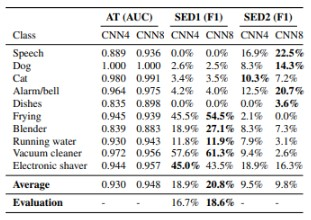

In [21]:
display(Image(filename="imagenes/resultado4.jpg", width=500, height=350))

En base a los resultados obtenidos las red convolucional con 8 capas resulta ser más efectiva que la red convolucional con 4 capas en el etiquetado del audio aunque difieren sus resultados en SED1(F1) y SED2(F1), pero, ¿que son SED1(F1) y SED2(F1)?

Ambos son utilizados como sistemas de detección de eventos de sonido, aunque presentan diferencias unas de otras. SED1 etiqueta el audio en cuestión como resultado de la detección del evento de sonido con inicio de 0 segundos y fin de 10 segundos, es decir, se sitúa el evento asumiendo que ocurre durante toda la duración del clip de audio. Si bien ésto puede ser positivo puesto que significa una detección rápida del etiquetado, no ofrece una localización puntual del evento a lo largo del archivo de audio. Por otra parte, SED2 utiliza las predicciones a nivel de marco (frame-wise-predictions). Es decir, para cada marco de tiempo del archivo de audio, una vez realizado dicha predicción a nivel de marco, se aplican umbrales para determinar cuando un evento de sonido se considera presente o no, pudiendo ser umbrales altos (0.8) o umbrales bajos (0.2), es decir, cual es nivel de confianza mínimo requerido para que se considere que un evento está o no ocurriendo. Una vez realizado ésto, SED2 puede determinar en qué segmentos dentro del clip puede estar ocurriendo los eventos de sonido, siendo definidos por un inicio y fin, en base a los criterios previamente establecidos. En ambos casos, se utiliza como medida de evaluación de la precisión del modelo el F1-score. La diferencia en la precisión de la evaluación del etiquetado puede influir en los resultados diferentes entre SED1 y SED2 en las medidas de F1-score, al añadirle el factor temporal en el SED2 el grado de rigurosidad al evaluar es más elevado, y por tanto, puede penalizar más el resultado final.

**5.Etiquetado de Audio Multicanal para Actividades Domésticas**

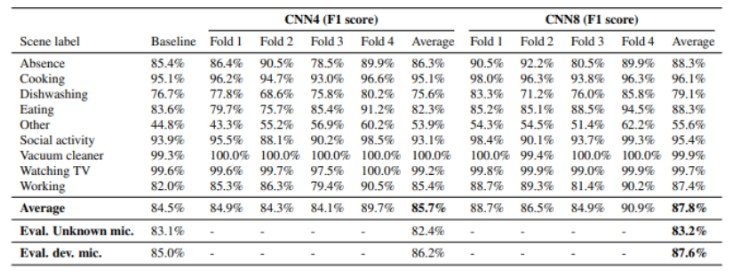

In [22]:
display(Image(filename="imagenes/resultado5.jpg", width=600, height=400))

En base a los resultados obtenidos, podemos señalar que CNN8 por lo general posee un mejor rendimiento en términos de F1-score, en la mayoría de los promedios y categorías señaladas, en cada uno de los pliegues o folds, así como en sus resultados a nivel promedio. Esto quiere que el modelo sea más efectivo en la identificación correcta de las clases relevantes y en minimizar los errores de clasificación tanto en los falsos positivos como en los falsos negativos.


# Código <a id="Código"></a>

El código que implementa el artículo descrito anteriormente se encuentra en el siguiente repositorio:

[Repositorio en GitHub](https://github.com/qiuqiangkong/dcase2018_task2/tree/master)

Además, este código está incluido en la carpeta "Código de referencia" del repositorio utilizado para este trabajo.

La siguiente figura muestra la estructura del código, que se compone principalmente de las siguientes carpetas y archivos:

- **utils**: Contiene funciones auxiliares, variables de configuración y scripts para crear los datos necesarios para el entrenamiento y validación del modelo.
- **pytorch**: Incluye el código de los modelos descritos anteriormente y la función que ejecuta el entrenamiento y validación.
- **runme.sh**: Archivo encargado de ejecutar el código en secuencia.

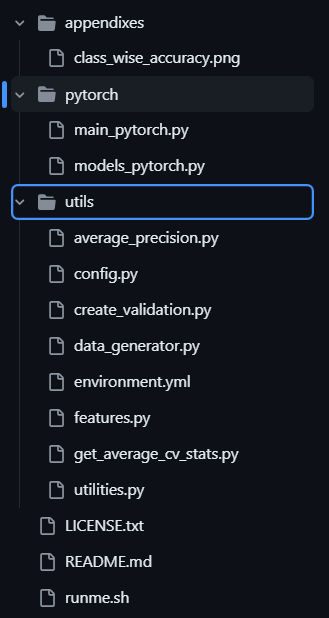

In [25]:
display(Image(filename="imagenes/Estructura.png", width=300))

Este repositorio también incluye instrucciones sobre cómo ejecutar el código. Sin embargo, en el presente trabajo, este código se ha readaptado para ejecutarse mediante un Jupyter Notebook y para que funcione con versiones más recientes de las librerías utilizadas. Por lo tanto, todos los archivos del código de referencia están descritos en este notebook, pero serán presentados según su distribución en los archivos del código de referencia.

### Librerías <a id="Librerías"></a>

Para ejecutar el código en este trabajo, se deben instalar las librerías descritas en el archivo `requirements.txt`. Estas se han actualizado del código original a las siguientes versiones:

- **matplotlib**: 2.2.2 -> 3.9.1
- **numpy**: 1.14.5 -> 1.26.4
- **h5py**: 2.8.0 -> 3.11.0
- **pytorch**: 0.4.0 -> 2.3.1
- **librosa**: 0.6.1 -> 0.10.2
- **scikit-learn**: 0.19.1 -> 1.5.1
- **soundfile**: 0.10.2 -> 0.12.1

A continuación se encuentran todas las importaciones necesarias para la ejecución del programa:

In [1]:
import os
import argparse
import sys
import soundfile
import numpy as np
import librosa
import h5py
import time
import random
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import logging

import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

from sklearn import preprocessing
import pickle

Los archivos y funciones presentes en la carpeta `utils` son los siguientes:

### utilities.py <a id="utilities.py"></a>

Implementa las siguientes funciones auxiliares:

- **create_folder**: Crea un directorio si no existe.
- **get_filename**: Devuelve el nombre de un archivo a partir de una ruta y sin la extensión. Sin embargo, no es utilizada para la ejecución de esta tarea.
- **create_logging**: Crea un directorio para logs, un archivo de log numerado, y configura la salida del log tanto en archivo como en consola. Sin embargo, no es utilizada para la ejecución de esta tarea.
- **read_audio**: Lee un archivo de audio y, opcionalmente, lo resamplea a una frecuencia objetivo (variable `target_fs`).
- **calculate_scalar**: Calcula la media y la desviación estándar de un arreglo.
- **scale**: Normaliza un arreglo usando la media y la desviación estándar proporcionadas.
- **inverse_scale**: Desnormaliza un arreglo utilizando la media y la desviación estándar proporcionadas. Sin embargo, no es utilizada para la ejecución de esta tarea.
- **repeat_seq**: Repite varias veces una lista hasta que tenga una longitud de `time_steps`. Luego, corta la lista repetida para que su longitud sea exactamente `time_steps` y la devuelve.
- **calculate_accuracy**: Calcula el Accuracy de la clasificación comparando las predicciones con las etiquetas reales.
- **print_class_wise_accuracy**: Imprime y retorna el Accuracy por clase.
- **plot_class_wise_accuracy**: Grafica el Accuracy por clase. Sin embargo, no es utilizada para la ejecución de esta tarea.
- **write_testing_data_submission_csv**: Escribe los resultados al probar el modelo en un archivo CSV.

In [2]:
def create_folder(fd):
    if not os.path.exists(fd):
        os.makedirs(fd)
   
def read_audio(path, target_fs=None):
    (audio, fs) = soundfile.read(path)
    if audio.ndim > 1:
        audio = np.mean(audio, axis=1)
    if target_fs is not None and fs != target_fs:
        audio = librosa.resample(audio, orig_sr=fs, target_sr=target_fs)
        fs = target_fs
    return audio, fs

def calculate_scalar(x):
    if x.ndim == 2:
        axis = 0
    elif x.ndim == 3:
        axis = (0, 1)
    mean = np.mean(x, axis=axis)
    std = np.std(x, axis=axis)
    return mean, std

def scale(x, mean, std):
    return (x - mean) / std

def repeat_seq(x, time_steps):
    repeat_num = time_steps // len(x) + 1
    repeat_x = np.tile(x, (repeat_num, 1))[0 : time_steps]
    return repeat_x
    
def calculate_accuracy(output, target):
    acc = np.sum(output == target) / float(len(target))
    return acc
    
def print_class_wise_accuracy(output, target):
    """Print class wise accuracy."""
    global labels
    global ix_to_lb
    correctness = np.zeros(len(labels), dtype=np.int32)
    total = np.zeros(len(labels), dtype=np.int32)
    for n in range(len(target)):
        total[target[n]] += 1
        if output[n] == target[n]:
            correctness[target[n]] += 1
    class_wise_accuracy = correctness.astype(np.float32) / total
    logging.info('{:<30}{}/{}\t{}'.format(
        'event labels', 'correct', 'total', 'accuracy'))
    for (n, label) in enumerate(labels):
        logging.info('{:<30}{}/{}\t\t{:.2f}'.format(
            label, correctness[n], total[n], class_wise_accuracy[n]))
    class_wise_accuracy = np.array(class_wise_accuracy)
    return class_wise_accuracy, correctness, total

def write_testing_data_submission_csv(submission_path, audio_names, 
                                      sorted_indices):
    global kmax
    global ix_to_lb
    global corrupted_files
    # Write result to submission csv
    f = open(submission_path, 'w')
    f.write('fname,label\n')
    for (n, audio_name) in enumerate(audio_names):
        f.write('{},'.format(audio_name))
        predicted_labels = [ix_to_lb[sorted_indices[n, k]] for k in range(kmax)]
        f.write(' '.join(predicted_labels)) 
        f.write('\n')
    for audio_name in corrupted_files:
        f.write('{},{}\n'.format(audio_name, 'Acoustic_guitar'))
    f.close()
    print("Write result to {}".format(submission_path))

### average_precision.py <a id="average_precision.py"></a>

Este archivo implementa funciones para evaluar la precisión del modelo:

- **apk**: Calcula la precisión promedio de las primeras k predicciones (por defecto, los primeros 10 elementos).

- **mapk**: Extiende la función `apk` a múltiples listas, calculando la precisión promedio de las primeras k predicciones para cada lista y luego promediando estos valores (por defecto, los primeros 10 elementos).

In [3]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

### data_generator.py <a id="data_generator.py"></a>

Este archivo contiene una clase `DataGenerator` que se utiliza para generar datos para entrenar y validar el modelo y la clase `TestDataGenerator` para generar datos de prueba. Las descripciones de los métodos de estas clases son las siguientes:

#### Clase `DataGenerator`
- **`__init__`**: Inicializa la clase con los parámetros dados, carga los datos desde un archivo HDF5 y calcula las estadísticas para la normalización.
- **`get_audio_indexes`**: Obtiene los índices de los audios de entrenamiento y validación a partir del archivo CSV de validación.
- **`calculate_training_data_scalar`**: Calcula la media y la desviación estándar de los datos de entrenamiento.
- **`calculate_patch_bgn_fin_y_tuples`**: Calcula las posiciones de inicio y fin de los segmentos de audio, de los datos de entrenamiento.
- **`get_patch_bgn_fin_y_tuples_for_an_audio`**: Calcula las posiciones de inicio y fin del segmentos de un audio.
- **`generate_train`**: Genera lotes de datos para el entrenamiento.
- **`get_batch_x_y`**: Obtiene los datos de entrada y las etiquetas para un lote (batch).
- **`generate_validate_slices`**: Genera lotes de datos para la validación del modelo.
- **`transform`**: Normaliza los datos.

#### Clase `TestDataGenerator`
- **`__init__`**: Inicializa la clase con los parámetros dados, carga los datos desde un archivo HDF5 y hereda los métodos de la clase `DataGenerator` (mediante *super(TestDataGenerator, self)*).
- **`generate_test_slices`**: Itera sobre los índices de los audios de prueba y genera lotes de datos normalizados junto con los nombres de los audios. 

In [4]:
class DataGenerator(object):
    
    def __init__(self, hdf5_path, batch_size, time_steps, 
        validation_csv=None, holdout_fold=None, seed=1234):
        """
        Inputs:
          hdf5_path: str, path of hdf5 data
          batch_size: int
          time_stes: int, number of frames of a logmel spectrogram patch
          validate_csv: string | None, if None then use all data for training
          holdout_fold: int
          seed: int, random seed
        """
        # Parameters
        self.batch_size = batch_size
        self.random_state = np.random.RandomState(seed)
        self.validate_random_state = np.random.RandomState(0)
        global labels
        self.labels = labels
        global lb_to_ix
        self.time_steps = time_steps
        self.hop_frames = self.time_steps // 2
        self.classes_num = len(self.labels)
        # Load data
        load_time = time.time()
        hf = h5py.File(hdf5_path, 'r')
        self.audio_names = np.array([s.decode() for s in hf['filename'][:]])
        self.x = hf['feature'][:]
        self.bgn_fin_indices = hf['bgn_fin_indices'][:]
        event_labels = hf['label'][:]
        self.y = np.array([lb_to_ix[s.decode()] for s in event_labels])
        self.manually_verifications = hf['manually_verification'][:]
        hf.close()
        logging.info('Loading data time: {:.3f} s'.format(
            time.time() - load_time))
        # Load validation
        if validation_csv:
            self.train_audio_indexes, self.validate_audio_indexes = \
                self.get_audio_indexes(validation_csv, holdout_fold)
        else:
            self.train_audio_indexes = np.arange(len(self.audio_names))
            self.validate_audio_indexes = np.array([])                  
        logging.info('Training audios number: {}'.format(
            len(self.train_audio_indexes)))
        logging.info('Validation audios number: {}'.format(
            len(self.validate_audio_indexes)))         
        # calculate scalar
        (self.mean, self.std) = self.calculate_training_data_scalar()
        # Get training patches
        self.train_patch_bgn_fin_y_tuples = \
            self.calculate_patch_bgn_fin_y_tuples(self.train_audio_indexes)
        logging.info('Training patches number: {}'.format(
            len(self.train_patch_bgn_fin_y_tuples)))
    
    def get_audio_indexes(self, validation_csv, holdout_fold):
        """Get train and audio indexes from validation csv. 
        """
        df = pd.read_csv(validation_csv, sep=',')
        df = pd.DataFrame(df)
        folds = df['fold']
        train_audio_indexes = np.where(folds != holdout_fold)[0]
        validate_audio_indexes = np.where(folds == holdout_fold)[0]
        return train_audio_indexes, validate_audio_indexes

    def calculate_training_data_scalar(self):
        """Concatenate all training data and calculate scalar. 
        """
        train_bgn_fin_indices = self.bgn_fin_indices[self.train_audio_indexes]
        train_x_concat = []
        for [bgn, fin] in train_bgn_fin_indices:
            train_x_concat.append(self.x[bgn : fin]) 
        train_x_concat = np.concatenate(train_x_concat, axis=0)
        (mean, std) = calculate_scalar(train_x_concat)
        return mean, std

    def calculate_patch_bgn_fin_y_tuples(self, audio_indexes):
        """Calculate (bgn, fin, y) tuples for selecting patches for training. 
        """
        bgn_fin_indices = self.bgn_fin_indices[audio_indexes]
        patch_bgn_fin_y_tuples = []
        for n in range(len(audio_indexes)):
            [bgn, fin] = bgn_fin_indices[n]
            y = self.y[audio_indexes[n]]
            patch_tuples_for_this_audio = \
                self.get_patch_bgn_fin_y_tuples_for_an_audio(bgn, fin, y)  
            patch_bgn_fin_y_tuples += patch_tuples_for_this_audio
        # Print class wise number of patches
        patches_per_class = np.zeros(self.classes_num, dtype=np.int32)
        for k in range(self.classes_num):
            patches_per_class[k] = np.sum(
                [tuple[2] == k for tuple in patch_bgn_fin_y_tuples])
        if False:
            for k in range(self.classes_num):
                logging.info('{:<30}{}'.format(
                    self.labels[k], patches_per_class[k]))
        return patch_bgn_fin_y_tuples

    def get_patch_bgn_fin_y_tuples_for_an_audio(self, bgn, fin, y):
        """Get (bgn, fin, y) tuples in an audio. 
        """
        
        if fin - bgn <= self.time_steps:
            patch_tuples_for_this_audio = [(bgn, fin, y)]
            
        else:
            bgns = np.arange(bgn, fin - self.time_steps, self.hop_frames)
            patch_tuples_for_this_audio = []
            
            for bgn in bgns:
                patch_tuples_for_this_audio.append(
                    (bgn, bgn + self.time_steps, y))
                
        return patch_tuples_for_this_audio
    

    def generate_train(self):
        batch_size = self.batch_size
        patch_bgn_fin_y_tuples = self.train_patch_bgn_fin_y_tuples.copy()
        time_steps = self.time_steps
        patches_num = len(patch_bgn_fin_y_tuples)
        self.random_state.shuffle(patch_bgn_fin_y_tuples)
        iteration = 0
        pointer = 0
        while True:
            # Reset pointer
            if pointer >= patches_num:
                pointer = 0
                self.random_state.shuffle(patch_bgn_fin_y_tuples)
            # Get batch indexes
            batch_patch_bgn_fin_y_tuples = patch_bgn_fin_y_tuples[
                pointer: pointer + batch_size]    
            pointer += batch_size
            iteration += 1
            (batch_x, batch_y) = self.get_batch_x_y(
                self.x, batch_patch_bgn_fin_y_tuples)
            # Transform data
            batch_x = self.transform(batch_x)
            yield batch_x, batch_y
        
    def get_batch_x_y(self, full_x, batch_patch_bgn_fin_y_tuples):
        """Get batch_x and batch_y, repeat is audio is short. 
        """
        batch_x = []
        batch_y = []
        for (bgn, fin, y) in batch_patch_bgn_fin_y_tuples:
            batch_y.append(y)
            if fin - bgn == self.time_steps:
                batch_x.append(full_x[bgn : fin])
            else:
                batch_x.append(repeat_seq(full_x[bgn : fin], self.time_steps))
        batch_x = np.array(batch_x)
        batch_y = np.array(batch_y)
        return batch_x, batch_y

    def generate_validate_slices(self, data_type, manually_verified_only, 
                                 shuffle, max_audios_num=None):
        """Generate patches in an audio. 
        Args:
          data_type: 'train' | 'validate'
          manually_verified_only: bool
          shuffle: bool
          max_audios_num: int, set maximum audios to speed up validation
        """
        if data_type == 'train':
            audio_indexes = np.array(self.train_audio_indexes)
        elif data_type == 'validate':
            audio_indexes = np.array(self.validate_audio_indexes)
        else:
            raise Exception('Incorrect data_type!')
        if manually_verified_only:
            manually_verified_indexes = np.where(
                self.manually_verifications[audio_indexes]==1)[0]
            audio_indexes = audio_indexes[manually_verified_indexes]
        if shuffle:
            self.validate_random_state.shuffle(audio_indexes)
        for (n, audio_index) in enumerate(audio_indexes):
            if n == max_audios_num:
                break
            [bgn, fin] = self.bgn_fin_indices[audio_index]
            y = self.y[audio_index]
            audio_name = self.audio_names[audio_index]
            patch_tuples_for_this_audio = \
                self.get_patch_bgn_fin_y_tuples_for_an_audio(bgn, fin, y)
            (batch_x_for_an_audio, _) = self.get_batch_x_y(
                self.x, patch_tuples_for_this_audio)
            batch_x_for_an_audio = self.transform(batch_x_for_an_audio)
            yield batch_x_for_an_audio, y, audio_name
                
    def transform(self, x):
        """Transform data. 
        Args:
          x: (batch_x, seq_len, freq_bins) | (seq_len, freq_bins)
        Returns:
          Transformed data. 
        """

        return scale(x, self.mean, self.std)
            
            
class TestDataGenerator(DataGenerator):
    
    def __init__(self, dev_hdf5_path, test_hdf5_path, time_steps, 
                 test_hop_frames):
        """Test data generator. 
        Args:
          dev_hdf5_path: str, path of development hdf5 file
          test_hdf5_path: str, path of test hdf5 file
          time_stes: int, number of frames of a logmel spectrogram patch
          test_hop_frames: int
        """
        super(TestDataGenerator, self).__init__(
            hdf5_path=dev_hdf5_path, 
            batch_size=None, 
            time_steps=time_steps,
            validation_csv=None)
        self.test_hop_frames = test_hop_frames
        global corrupted_files
        self.corrupted_files = corrupted_files
        # Load test data
        load_time = time.time()
        hf = h5py.File(test_hdf5_path, 'r')
        self.test_audio_names = np.array([s.decode() for s in hf['filename'][:]])
        self.test_x = hf['feature'][:]
        self.test_bgn_fin_indices = hf['bgn_fin_indices'][:]
        hf.close()
        logging.info('Loading data time: {:.3f} s'.format(
            time.time() - load_time))
    
    def generate_test_slices(self):
        test_hop_frames = self.test_hop_frames
        global corrupted_files
        corrupted_files = corrupted_files
        audio_indexes = range(len(self.test_audio_names))
        for (n, audio_index) in enumerate(audio_indexes):
            [bgn, fin] = self.test_bgn_fin_indices[audio_index]
            audio_name = self.test_audio_names[audio_index]
            if fin > bgn:
                patch_tuples_for_this_audio = \
                    self.get_patch_bgn_fin_y_tuples_for_an_audio(bgn, fin, y=None)
                (batch_x_for_an_audio, _) = \
                    self.get_batch_x_y(self.test_x, patch_tuples_for_this_audio)
                batch_x_for_an_audio = self.transform(batch_x_for_an_audio)
                yield batch_x_for_an_audio, audio_name

### config.py  <a id="config.py"></a>

Este archivo define las variables necesarias para la ejecución del resto de funciones:

- **sample_rate**: Especifica la tasa de muestreo de la señal de audio entrante. En este caso, es de 32000 muestras por segundo
- **window_size**: Número de componentes FFT (2048 en este caso).
- **overlap**: Número de puntos que se superpondrán entre segmentos del espectrograma (1024 muestras).
- **mel_bins**: Número de bandas Mel a generar en el banco de filtros Mel. Esto genera una matriz de transformación lineal para proyectar los bins de FFT en bins de frecuencia Mel.
- **labels**: Lista que contiene los nombres de las diferentes clases de sonidos.
- **lb_to_ix**: Diccionario que mapea cada etiqueta de `labels` a su índice correspondiente.
- **ix_to_lb**: Diccionario que mapea cada índice de `labels` a su etiqueta correspondiente.
- **corrupted_files**: Lista que contiene los nombres de archivos de audio que se consideran corruptos o problemáticos.

In [5]:
sample_rate = 32000

window_size = 2048
overlap = 1024

mel_bins = 64

kmax = 3

labels = ['Acoustic_guitar', 'Applause', 'Bark', 'Bass_drum', 
          'Burping_or_eructation', 'Bus', 'Cello', 'Chime', 'Clarinet', 
          'Computer_keyboard', 'Cough', 'Cowbell', 'Double_bass', 
          'Drawer_open_or_close', 'Electric_piano', 'Fart', 'Finger_snapping', 
          'Fireworks', 'Flute', 'Glockenspiel', 'Gong', 'Gunshot_or_gunfire', 
          'Harmonica', 'Hi-hat', 'Keys_jangling', 'Knock', 'Laughter', 'Meow', 
          'Microwave_oven', 'Oboe', 'Saxophone', 'Scissors', 'Shatter', 
          'Snare_drum', 'Squeak', 'Tambourine', 'Tearing', 'Telephone', 
          'Trumpet', 'Violin_or_fiddle', 'Writing']

lb_to_ix = {lb: i for i, lb in enumerate(labels)}

ix_to_lb = {i: lb for i, lb in enumerate(labels)}

corrupted_files = ['0b0427e2.wav', '6ea0099f.wav', 'b39975f5.wav']

### create_validation.py <a id="create_validation.py"></a>
Este archivo contiene una única función destinada a la validación del modelo:
- **create_validation_folds_**: Crea una estructura para realizar la validación cruzada, la cual se guarda en un archivo CSV llamado `validate_meta.csv`.

In [6]:
def create_validation_folds(dataset_dir, workspace):
    """Create validation file with folds and write out to validate_meta.csv
    """
    random_state = np.random.RandomState(1234)
    folds_num = 4
    # Paths
    csv_path = os.path.join(dataset_dir, 'train.csv')
    # Read csv
    df = pd.DataFrame(pd.read_csv(csv_path))
    indexes = np.arange(len(df))
    random_state.shuffle(indexes)
    audios_num = len(df)
    audios_num_per_fold = int(audios_num // folds_num)
    # Create folds
    folds = np.zeros(audios_num, dtype=np.int32)
    for n in range(audios_num):
        folds[indexes[n]] = (n % folds_num) + 1
    df_ex = df
    df_ex['fold'] = folds
    # Write out validation csv
    out_path = os.path.join(workspace, 'validate_meta.csv')
    df_ex.to_csv(out_path)
    print("Write out to {}".format(out_path))

Se ejecutará esta función especificando que los datos se encuentran en la ruta `./Data` (carpeta no incluida debido al gran tamaño).

In [7]:
dataset_dir = "./Data"
workspace = "./"
create_validation_folds(dataset_dir, workspace)

Write out to ./validate_meta.csv


### features.py <a id="features.py"></a>

Este archivo contiene la clase `LogMelExtractor`, que se encarga de extraer las características de los audios.

- **\_\_init\_\_**: Inicializa el extractor de características con los parámetros proporcionados y calcula el banco de filtros Mel.
- **transform**: Transforma un fragmento de audio en características utilizando el logaritmo de la multiplicación del banco de filtros Mel con el espectrograma del mismo.
- **calculate_logmel**: Lee un archivo de audio, lo normaliza y extrae sus características mediante el método `transform`.
- **calculate_features**: Lee los audios de un archivo CSV, extrae las características para cada uno y escribe estas características junto con otros metadatos en un archivo HDF5. HDF son las siglas de Hierarchical Data Format (Formato de datos jerárquicos) y fue diseñado para guardar y recuperar datos de/hacia archivos grandes estructurados.

In [8]:
class LogMelExtractor():

    def __init__(self, sample_rate, window_size, overlap, mel_bins):
        self.window_size = window_size
        self.overlap = overlap
        self.ham_win = np.hamming(window_size)
        self.melW = librosa.filters.mel(sr=sample_rate, 
                                        n_fft=window_size, 
                                        n_mels=mel_bins, 
                                        fmin=50., 
                                        fmax=sample_rate // 2).T
    
    def transform(self, audio):
        ham_win = self.ham_win
        window_size = self.window_size
        overlap = self.overlap
        [f, t, x] = signal.spectral.spectrogram(
                        audio, 
                        window=ham_win,
                        nperseg=window_size, 
                        noverlap=overlap, 
                        detrend=False, 
                        return_onesided=True, 
                        mode='magnitude') 
        x = x.T
        x = np.dot(x, self.melW)
        x = np.log(x + 1e-8)
        x = x.astype(np.float32)
        return x

def calculate_logmel(audio_path, sample_rate, extractor):
    (audio, _) = read_audio(audio_path, target_fs=sample_rate)
    audio = audio / np.max(np.abs(audio))
    feature = extractor.transform(audio)
    return feature

def calculate_features(dataset_dir, workspace, data_type, mini_data):
    """Write features and infos of audios to a hdf5 file.
    """
    global sample_rate
    global window_size
    global overlap
    global mel_bins
    global corrupted_files
    # Paths
    if data_type == 'development':
        audio_dir = os.path.join(dataset_dir, 'audio_train')
        meta_csv = os.path.join(dataset_dir, 'train.csv')
    elif data_type == 'test':
        audio_dir = os.path.join(dataset_dir, 'audio_test')
        meta_csv = os.path.join(dataset_dir, 'sample_submission.csv')
    if mini_data:
        hdf5_path = os.path.join(workspace, 'features', 'logmel', 
                                 'mini_{}.h5'.format(data_type))
    else:
        hdf5_path = os.path.join(workspace, 'features', 'logmel', 
                                 '{}.h5'.format(data_type))
    create_folder(os.path.dirname(hdf5_path))
    # Load csv
    df = pd.DataFrame(pd.read_csv(meta_csv))
    audio_names = []
    if data_type == 'development':
        manually_verifications = []
        target_labels = []
    for row in df.iterrows():
        audio_name = row[1]['fname']
        audio_names.append(audio_name)
        if data_type == 'development':
            target_label = row[1]['label']
            manually_verification = row[1]['manually_verified']
            target_labels.append(target_label)
            manually_verifications.append(manually_verification)
    # Use partial data when set mini_data to True
    if mini_data:
        audios_num = 300
        random_state = np.random.RandomState(0)
        audio_indexes = np.arange(len(audio_names))
        random_state.shuffle(audio_indexes)
        audio_indexes = audio_indexes[0 : audios_num]
        audio_names = [audio_names[idx] for idx in audio_indexes]
        if data_type == 'development':
            target_labels = [target_labels[idx] for idx in audio_indexes]
            manually_verifications = [manually_verifications[idx] 
                                      for idx in audio_indexes]
        print("Number of audios: {}".format(len(audio_names)))
    # Feature extractor
    extractor = LogMelExtractor(sample_rate=sample_rate,
                                window_size=window_size,
                                overlap=overlap,
                                mel_bins=mel_bins)
    # Write out to h5 file
    hf = h5py.File(hdf5_path, 'w')
    hf.create_dataset(
        name='feature',
        shape=(0, mel_bins),
        maxshape=(None, mel_bins),
        dtype=np.float32)
    calculate_time = time.time()
    bgn_fin_indices = []
    # Extract feature for audios
    for (n, audio_name) in enumerate(audio_names):
        # Extract feature
        if audio_name in corrupted_files:
            feature = np.zeros((0, mel_bins))
        else:
            audio_path = os.path.join(audio_dir, audio_name)
            feature = calculate_logmel(audio_path, sample_rate, extractor)
        # Write feature to hdf5
        bgn_indice = hf['feature'].shape[0]
        fin_indice = bgn_indice + feature.shape[0]
        hf['feature'].resize((fin_indice, mel_bins))
        hf['feature'][bgn_indice: fin_indice] = feature
        bgn_fin_indices.append((bgn_indice, fin_indice))
    # Write infos to hdf5
    hf.create_dataset(name='filename', 
                      data=[s.encode() for s in audio_names], 
                      dtype='S32')
    hf.create_dataset(name='bgn_fin_indices',
                      data=bgn_fin_indices,
                      dtype=np.int32)
    if data_type == 'development':
        hf.create_dataset(name='label', 
                          data=[s.encode() for s in target_labels], 
                          dtype='S32')
        hf.create_dataset(name='manually_verification',
                          data=manually_verifications,
                          dtype=np.int32)
    hf.close()
    
    print("Write out hdf5 file to {}".format(hdf5_path))
    print("Time spent: {} s".format(time.time() - calculate_time))

Al ejecutar el código, se crea la carpeta `features` donde se almacenan los archivos HDF5 llamado `development.h5` y `test.h5`. Sin embargo, esta carpeta no se incluye en el repositorio, ya que estos archivos son de gran tamaño.

In [9]:
data_type = 'development'
mini_data = False
calculate_features(dataset_dir, workspace, data_type, mini_data)

C:\Users\gluar\AppData\Local\Temp\ipykernel_24252\540075642.py:17: DeprecationWarning: Please import `spectrogram` from the `scipy.signal` namespace; the `scipy.signal.spectral` namespace is deprecated and will be removed in SciPy 2.0.0.
  [f, t, x] = signal.spectral.spectrogram(


Write out hdf5 file to ./features\logmel\development.h5
Time spent: 500.94531750679016 s


In [10]:
data_type = 'test'
calculate_features(dataset_dir, workspace, data_type, mini_data)

C:\Users\gluar\AppData\Local\Temp\ipykernel_24252\540075642.py:17: DeprecationWarning: Please import `spectrogram` from the `scipy.signal` namespace; the `scipy.signal.spectral` namespace is deprecated and will be removed in SciPy 2.0.0.
  [f, t, x] = signal.spectral.spectrogram(


Write out hdf5 file to ./features\logmel\test.h5
Time spent: 427.07563042640686 s


Los archivos y funciones presentes en la carpeta `pytorch` son los siguientes:

### model_pytorch.py <a id="model_pytorch.py"></a>

Este archivo define las funciones y clases en PyTorch necesarias para construir y entrenar las redes neuronales convolucionales (CNN) descritas en el artículo para la clasificación de audios.

- **move_data_to_gpu**: Mueve los datos a la GPU si CUDA está disponible.
- **init_layer**: Inicializa los pesos y sesgos de una capa de la red según el método de inicialización propuesto por Kaiming He et al. (2015). Este método se basa en la idea de que las CNNs profundas (con más de 8 capas) tienen problemas para converger si la desviación estándar de los pesos es fija. El método inicializa los pesos con una distribución gaussiana de media cero y desviación estándar $\sqrt{\frac{2}{n_l}}$ (donde $n_l$ es el número de conexiones de la capa) y los sesgos como $b = 0$.
- **init_bn**: Inicializa una capa de normalización por lotes (batch normalization) estableciendo el sesgo en 0 y el peso en1. Este método se utiliza para acelerar y estabilizar el entrenamiento de redes neuronales mediante la normalización de las entradas de las capas.
- **BaselineCnn**: Es una clase que define una CNN con 4 capas convolucionales, con 64, 128, 256 y 512 canales respectivamente, un kernel de 5x5, un stride de 2 y un padding de 2. Cada capa convolucional incluye una normalización por lotes y una función de activación ReLU. Luego le sigue de una capa de max pooling y, finalmente, la red cuenta con una capa totalmente conectada con una función de activación log softmax para la clasificación.
- **VggishConvBlock**: Es una clase que define un bloque convolucional. Está compuesto por dos capas convolucionales, cada una seguida de una capa de normalización por lotes y una función de activación ReLU. Al final del bloque, se aplica una operación de max pooling. Las capas convolucionales en el bloque tienen un kernel de 3x3, un stride de 1 y un padding de 1.
- **Vggish**: Es una clase que define la arquitectura de una red neuronal convolucional. Esta red está compuesta por cuatro bloques `VggishConvBlock`, seguidos de una capa de max pooling y una capa totalmente conectada para la clasificación. Finalmente, la red aplica una función de activación log softmax en la capa totalmente conectada para obtener las probabilidades de clasificación.

In [11]:
def move_data_to_gpu(x, cuda):
    if 'float' in str(x.dtype):
        x = torch.Tensor(x)
    elif 'int' in str(x.dtype):
        x = torch.LongTensor(x)
    else:
        raise Exception("Error!")
    if cuda:
        x = x.cuda()
    return x

def init_layer(layer):
    """Initialize a Linear or Convolutional layer. 
    Ref: He, Kaiming, et al. "Delving deep into rectifiers: Surpassing 
    human-level performance on imagenet classification." Proceedings of the 
    IEEE international conference on computer vision. 2015.
    """
    if layer.weight.ndimension() == 4:
        (n_out, n_in, height, width) = layer.weight.size()
        n = n_in * height * width 
    elif layer.weight.ndimension() == 2:
        (n_out, n) = layer.weight.size()
    std = math.sqrt(2. / n)
    scale = std * math.sqrt(3.)
    layer.weight.data.uniform_(-scale, scale)
    if layer.bias is not None:
        layer.bias.data.fill_(0.)


def init_bn(bn):
    """Initialize a Batchnorm layer. """
    bn.bias.data.fill_(0.)
    bn.weight.data.fill_(1.)
    
class BaselineCnn(nn.Module):
    def __init__(self, classes_num):
        super(BaselineCnn, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64,
                               kernel_size=(5, 5), stride=(2, 2),
                               padding=(2, 2), bias=False)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128,
                               kernel_size=(5, 5), stride=(2, 2),
                               padding=(2, 2), bias=False)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256,
                               kernel_size=(5, 5), stride=(2, 2),
                               padding=(2, 2), bias=False)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=512,
                               kernel_size=(5, 5), stride=(2, 2),
                               padding=(2, 2), bias=False)
        self.fc1 = nn.Linear(512, classes_num, bias=True)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        self.init_weights()

    def init_weights(self):
        init_layer(self.conv1)
        init_layer(self.conv2)
        init_layer(self.conv3)
        init_layer(self.conv4)
        init_layer(self.fc1)
        init_bn(self.bn1)
        init_bn(self.bn2)
        init_bn(self.bn3)
        init_bn(self.bn4)

    def forward(self, input, return_bottleneck=False):
        (_, seq_len, mel_bins) = input.shape
        x = input.view(-1, 1, seq_len, mel_bins)
        """(samples_num, feature_maps, time_steps, freq_num)"""
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.max_pool2d(x, kernel_size=x.shape[2:])
        x = x.view(x.shape[0:2])
        x = F.log_softmax(self.fc1(x), dim=-1)
        return x
    
class VggishConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(VggishConvBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channels, 
                              out_channels=out_channels,
                              kernel_size=(3, 3), stride=(1, 1),
                              padding=(1, 1), bias=False)              
        self.conv2 = nn.Conv2d(in_channels=out_channels, 
                              out_channels=out_channels,
                              kernel_size=(3, 3), stride=(1, 1),
                              padding=(1, 1), bias=False)               
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.init_weights()

    def init_weights(self):
        init_layer(self.conv1)
        init_layer(self.conv2)
        init_bn(self.bn1)
        init_bn(self.bn2)
    
    def forward(self, input):
        x = input
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, kernel_size=(2, 2), stride=(2, 2))
        return x
    
    
class Vggish(nn.Module):
    def __init__(self, classes_num):
        super(Vggish, self).__init__()
        self.conv_block1 = VggishConvBlock(in_channels=1, out_channels=64)
        self.conv_block2 = VggishConvBlock(in_channels=64, out_channels=128)
        self.conv_block3 = VggishConvBlock(in_channels=128, out_channels=256)
        self.conv_block4 = VggishConvBlock(in_channels=256, out_channels=512)
        self.fc_final = nn.Linear(512, classes_num, bias=True)
        self.init_weights()

    def init_weights(self):
        init_layer(self.fc_final)

    def forward(self, input, return_bottleneck=False):
        (_, seq_len, mel_bins) = input.shape
        x = input.view(-1, 1, seq_len, mel_bins)
        '''(samples_num, feature_maps, time_steps, freq_num)'''
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = F.max_pool2d(x, kernel_size=x.shape[2:])
        x = x.view(x.shape[0:2])
        x = F.log_softmax(self.fc_final(x), dim=-1)
        return x

### main_pytorch.py <a id="main_pytorch.py"></a>

Este archivo contiene las funciones encargadas de ejecutar el entrenamiento y la validación de los modelos.

- **aggregate_outputs**: Agrega las predicciones de diferentes segmentos de clips de audio para obtener una predicción final.
- **evaluate**: Ejecuta las funciones que miden el rendimiento del modelo en los datos de entrenamiento o validación, retornando el Accuracy y el Mapk.
- **forward**: Pasa datos a través del modelo para obtener las predicciones.
- **train**: Ejecuta el entrenamiento del modelo con los datos de entrenamiento, moviendo los datos a la GPU si es necesario y guardando un checkpoint del modelo cada 1000 iteraciones en la carpeta `models`.
- **inference_validation_data**: Carga uno de los checkpoints del modelo, genera lotes de datos para la validación del modelo y calcula el Accuracy y el Mapk a partir de estos datos, guardando los resultados en la carpeta `stats`.
- **inference_testing_data**: Carga uno de los checkpoints del modelo, genera lotes de datos para probar el modelo y realiza las predicciones, guardando los resultados en el archivo `submission.csv` de la carpeta `submission`.

In [12]:
Model = Vggish
batch_size = 128
time_steps = 128
train_hop_frames = 64
test_hop_frames = 16

def aggregate_outputs(outputs):
    """Aggregate the prediction of patches of audio clips. 
    Args:
      outputs: (audios_num, patches_num, classes_num)
    Returns:
      agg_outputs: (audios_num)
    """
    agg_outputs = []
    for output in outputs:
        agg_output = np.mean(output, axis=0)
        agg_outputs.append(agg_output)
    agg_outputs = np.array(agg_outputs)
    return agg_outputs
    
def evaluate(model, generator, data_type, cuda):
    """Evaluate
    Args:
      model: object.
      generator: object.
      data_type: 'train' | 'validate'.
      cuda: bool.
    Returns:
      accuracy: float
      mapk: float
    """
    if data_type == 'train':
        max_audios_num = 1000   # A small portion of training data to evaluate
    elif data_type == 'validate':
        max_audios_num = None   # All evaluation data to evaluate
    generate_func = generator.generate_validate_slices(
        data_type=data_type, 
        manually_verified_only=True, 
        shuffle=True, 
        max_audios_num=max_audios_num)
    # Forward
    dict = forward(model=model, 
                   generate_func=generate_func, 
                   cuda=cuda, 
                   return_target=True)

    outputs = dict['output']    # (audios_num, patches_num, classes_num)
    targets = dict['target']    # (audios_num,)
    agg_outputs = aggregate_outputs(outputs)
    '''(audios_num, classes_num)'''
    predictions = np.argmax(agg_outputs, axis=-1)
    '''(audios_num,)'''
    sorted_indices = np.argsort(agg_outputs, axis=-1)[:, ::-1][:, :kmax]
    '''(audios_num, kmax)'''
    # Accuracy
    accuracy = calculate_accuracy(predictions, targets)
    # mAP
    mapk_value = mapk(actual=[[e] for e in targets], 
                      predicted=[e.tolist() for e in sorted_indices], 
                      k=kmax)
    return accuracy, mapk_value
  
def forward(model, generate_func, cuda, return_target):
    """Forward data to a model.
    Args:
      generate_func: generate function
      cuda: bool
      return_target: bool
    Returns:
      dict, keys: 'audio_name', 'output'; optional keys: 'target'
    """
    outputs = []
    audio_names = []
    if return_target:
        targets = []
    # Evaluate on mini-batch
    for data in generate_func:
        if return_target:
            (batch_x_for_an_audio, y, audio_name) = data
        else:
            (batch_x_for_an_audio, audio_name) = data
        batch_x_for_an_audio = move_data_to_gpu(batch_x_for_an_audio, cuda)
        # Predict
        model.eval()
        outputs_for_an_audio = model(batch_x_for_an_audio)
        # Append data
        outputs.append(outputs_for_an_audio.data.cpu().numpy())
        audio_names.append(audio_name)
        if return_target:
            targets.append(y)
    dict = {}
    outputs = np.asarray(outputs, dtype="object")
    dict['output'] = outputs
    audio_names = np.array(audio_names)
    dict['audio_name'] = audio_names
    if return_target:
        targets = np.array(targets)
        dict['target'] = targets
    return dict
    
def train(workspace, filename, validate, holdout_fold, cuda, mini_data):
    global labels
    num_classes = len(labels)
    # Use partial data for training
    if mini_data:
        hdf5_path = os.path.join(workspace, 'features', 'logmel', 'mini_development.h5')        
    else:
        hdf5_path = os.path.join(workspace, 'features', 'logmel', 'development.h5')
    
    if validate:
        validation_csv = os.path.join(workspace, 'validate_meta.csv')
        models_dir = os.path.join(workspace, 'models', filename, 
            'holdout_fold{}'.format(holdout_fold))
    else:
        validation_csv = None
        models_dir = os.path.join(workspace, 'models', filename, 'full_train')
    create_folder(models_dir)
    # Model
    model = Model(num_classes)
    if cuda:
        model.cuda()
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), 
                           eps=1e-08, weight_decay=0.)
    # Data generator
    generator = DataGenerator(hdf5_path=hdf5_path, 
                              batch_size=batch_size, 
                              time_steps=time_steps, 
                              validation_csv=validation_csv, 
                              holdout_fold=holdout_fold)
    iteration = 0
    train_bgn_time = time.time()
    # Train on mini batches
    for (batch_x, batch_y) in generator.generate_train():
        # Evaluate
        if iteration % 200 == 0:
            train_fin_time = time.time()
            (tr_acc, tr_mapk) = evaluate(model=model, 
                                         generator=generator, 
                                         data_type='train', 
                                         cuda=cuda)                   
            logging.info('train acc: {:.3f}, train mapk: {:.3f}'.format(
                tr_acc, tr_mapk))    
            if validate:
                (va_acc, va_mapk) = evaluate(model=model, 
                                             generator=generator, 
                                             data_type='validate', 
                                             cuda=cuda)                    
                logging.info('valid acc: {:.3f}, validate mapk: {:.3f}'.format(
                    va_acc, va_mapk))
            train_time = train_fin_time - train_bgn_time
            validate_time = time.time() - train_fin_time
            logging.info('------------------------------------')
            logging.info('Iteration: {}, train time: {:.3f} s, eval time: '
                '{:.3f} s'.format(iteration, train_time, validate_time))
            train_bgn_time = time.time()
        # Save model
        if iteration % 1000 == 0 and iteration > 0:
            save_out_dict = {'iteration': iteration, 
                             'state_dict': model.state_dict(), 
                             'optimizer': optimizer.state_dict(), }
            save_out_path = os.path.join(models_dir, 
                'md_{}_iters.tar'.format(iteration))
            torch.save(save_out_dict, save_out_path)
            logging.info('Save model to {}'.format(save_out_path))
        # Reduce learning rate
        if iteration % 100 == 0 and iteration > 0:
            for param_group in optimizer.param_groups:
                param_group['lr'] *= 0.9
        batch_x = move_data_to_gpu(batch_x, cuda)
        batch_y = move_data_to_gpu(batch_y, cuda)
        # Forward
        t_forward = time.time()
        model.train()
        output = model(batch_x)
        # Loss
        loss = F.nll_loss(output, batch_y)
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        iteration += 1
        # Stop learning
        if iteration == 10001:
            break
    
def inference_validation_data(workspace, holdout_fold, iteration, filename, cuda):
    global labels
    classes_num = len(labels)
    # Paths    
    model_path = os.path.join(workspace, 'models', filename, 
                              'holdout_fold{}'.format(holdout_fold), 
                              'md_{}_iters.tar'.format(iteration))
    hdf5_path = os.path.join(workspace, 'features', 'logmel', 
                             'development.h5')
    validation_csv = os.path.join(workspace, 'validate_meta.csv')
    stats_pickle_path = os.path.join(workspace, 'stats', filename, 
                                     'holdout_fold{}'.format(holdout_fold), 
                                     '{}_iters.p'.format(iteration))
    create_folder(os.path.dirname(stats_pickle_path))
    # Model
    model = Model(classes_num)
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['state_dict'])
    if cuda:
        model.cuda()
    # Data generator
    generator = DataGenerator(hdf5_path=hdf5_path, 
                              batch_size=batch_size, 
                              time_steps=time_steps, 
                              validation_csv=validation_csv, 
                              holdout_fold=holdout_fold)
    
    generate_func = generator.generate_validate_slices(
        data_type='validate', 
        manually_verified_only=True, 
        shuffle=False, 
        max_audios_num=None)
    # Forward
    dict = forward(model=model, 
                   generate_func=generate_func, 
                   cuda=cuda, 
                   return_target=True)

    outputs = dict['output']    # (audios_num, patches_num, classes_num)
    targets = dict['target']    # (audios_num,)
    agg_outputs = aggregate_outputs(outputs)
    '''(audios_num, classes_num)'''
    predictions = np.argmax(agg_outputs, axis=-1)
    '''(audios_num,)'''
    sorted_indices = np.argsort(agg_outputs, axis=-1)[:, ::-1][:, :kmax]
    '''(audios_num, kmax)'''
    # Accuracy
    accuracy = calculate_accuracy(predictions, targets)
    # mAP
    mapk_value = mapk(actual=[[e] for e in targets], 
                      predicted=[e.tolist() for e in sorted_indices], 
                      k=kmax)
    # Print
    logging.info('')
    logging.info('iteration: {}'.format(iteration))
    logging.info('accuracy: {:.3f}'.format(accuracy))
    logging.info('mapk: {:.3f}'.format(mapk_value))
    (class_wise_accuracy, correctness, total) = print_class_wise_accuracy(
        predictions, targets)
    # Save stats for current holdout training
    dict = {'correctness': correctness, 'total': total, 
            'accuracy': accuracy, 'mapk': mapk_value}
    pickle.dump(dict, open(stats_pickle_path, 'wb'))
    logging.info('Write out stat to {}'.format(stats_pickle_path))
    
def inference_testing_data(workspace, iteration, filename, cuda):
    global labels
    num_classes = len(labels)
    # Paths
    model_path = os.path.join(workspace, 'models', filename, 'holdout_fold1', 
                              'md_{}_iters.tar'.format(iteration))
    dev_hdf5_path = os.path.join(workspace, 'features', 'logmel', 
                                 'development.h5')                  
    test_hdf5_path = os.path.join(workspace, 'features', 'logmel', 'test.h5')
    submission_path = os.path.join(workspace, 'submissions', filename, 
                                   'iteration={}'.format(iteration), 
                                   'submission.csv')
    create_folder(os.path.dirname(submission_path))
    # Model
    model = Model(num_classes) 
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['state_dict'])
    if cuda:
        model.cuda()
    # Data generator
    test_generator = TestDataGenerator(dev_hdf5_path=dev_hdf5_path, 
                                       test_hdf5_path=test_hdf5_path, 
                                       test_hop_frames=test_hop_frames, 
                                       time_steps=time_steps)
    generate_func = test_generator.generate_test_slices()
    # Forward
    dict = forward(model=model, 
                   generate_func=generate_func, 
                   cuda=cuda, 
                   return_target=False)
    outputs = dict['output']
    audio_names = dict['audio_name']
    agg_outputs = aggregate_outputs(outputs)
    '''(audios_num, classes_num)'''
    predictions = np.argmax(agg_outputs, axis=-1)
    '''(audios_num,)'''
    sorted_indices = np.argsort(agg_outputs, axis=-1)[:, ::-1][:, :kmax]
    '''(audios_num, kmax)'''
    # Write out submission csv
    write_testing_data_submission_csv(submission_path, audio_names, 
                                      sorted_indices)

## Ejecución <a id="Ejecución"></a>

Para la ejecución del programa se definieron las siguientes variables:

In [ ]:
workspace = "./"
cuda = 0
holdout_fold = 1
filename = ""
validate = 1
mini_data = 0

De estas, se destaca la variable cuda, que indica que el programa se ejecutará en la CPU.

### Entrenamiento

Para el entrenamiento del modelo se ejecuta el siguiente comando:

In [ ]:
train(workspace, filename, validate, holdout_fold, cuda, mini_data)

Ejecutándolo en un computador con las siguientes especificaciones:

- **Procesador**: Intel Core i5-10300H con 4 núcleos y 2.50 GHz
- **RAM**: 12 GB

el entrenamiento tomó alrededor de 60 horas, generando los siguientes checkpoints en la carpeta `models`:

- md_1000_iters.tar
- md_2000_iters.tar
- md_3000_iters.tar
- md_4000_iters.tar
- md_5000_iters.tar
- md_6000_iters.tar
- md_7000_iters.tar
- md_8000_iters.tar
- md_9000_iters.tar
- md_10000_iters.tar

### Rendimiento
Para obtener el rendimiento del modelo, se seleccionó el checkpoint correspondiente a las 8000 iteraciones. El comando para ejecutar esta evaluación es el siguiente:

In [ ]:
iteration = 8000
inference_validation_data(workspace, holdout_fold, iteration, filename, cuda)

El cual generó el archivo `8000_iters.p` en la carpeta `stats`. A partir de este archivo, se obtuvieron los siguientes valores de rendimiento:

- **Accuracy**: 0.90595
- **Mapk**: 0.93622

In [13]:
file_name = './stats/holdout_fold1/8000_iters.p'
with open(file_name, 'rb') as file:
    data = pickle.load(file)
print(data)

{'correctness': array([28, 15, 10, 20, 24, 11, 30, 15, 31, 16, 21, 24, 31, 15, 14, 17, 17,
       18, 31, 13, 12, 24, 21, 18, 18, 31, 22, 12, 12, 19, 64, 10, 17, 12,
       10, 19, 11, 20, 16, 58, 11]), 'total': array([33, 15, 11, 20, 24, 15, 32, 19, 32, 16, 21, 25, 31, 16, 16, 20, 17,
       18, 32, 13, 13, 35, 22, 20, 19, 31, 26, 12, 16, 19, 66, 16, 18, 12,
       18, 19, 13, 37, 17, 59, 11]), 'accuracy': 0.9059459459459459, 'mapk': 0.9362162162162162}


### Predicción

Para obtener las predicciones, se ejecuta el siguiente comando:

In [ ]:
inference_testing_data(workspace, iteration, filename, cuda)

Las predicciones se guardan en el archivo submission.csv de la carpeta submissions, en el formato requerido para la entrega del desafío.

## Bibliografía
- [GENERAL-PURPOSE TAGGING OF FREESOUND AUDIO WITH AUDIOSET LABELS: TASK DESCRIPTION, DATASET, AND BASELINE](https://arxiv.org/pdf/1807.09902)
- [DCASE 2018 CHALLENGE SURREY CROSS-TASK CONVOLUTIONAL NEURAL NETWORK BASELINE](https://dcase.community/documents/challenge2018/technical_reports/DCASE2018_Baseline_87.pdf)
- [Repositorio: DCASE 2018 CHALLENGE SURREY CROSS-TASK CONVOLUTIONAL NEURAL NETWORK BASELINE](https://github.com/qiuqiangkong/dcase2018_task2/tree/master)
- [Librosa Mel Filters](https://librosa.org/doc/latest/generated/librosa.filters.mel.html)
- [SciPy Spectrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html)
- [HDF5 Manual](https://www.scayle.es/manual/es/hpc/software-instalado/hdf5)
- [He et al., 2015](https://arxiv.org/pdf/1502.01852)
- [Batch Normalization](https://en.wikipedia.org/wiki/Batch_normalization)
